importinf file

In [ ]:
import os
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

loading the data

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


VIZUALIZATION

<AxesSubplot:xlabel='count'>

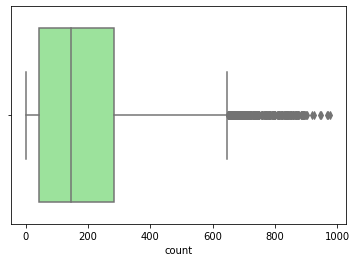

In [ ]:
sns.boxplot(x= 'count', data = train, color = 'lightgreen')


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

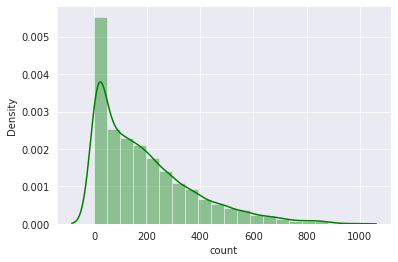

In [ ]:
sns.set_style('darkgrid')
sns.distplot(train['count'], bins = 20, color = 'green')

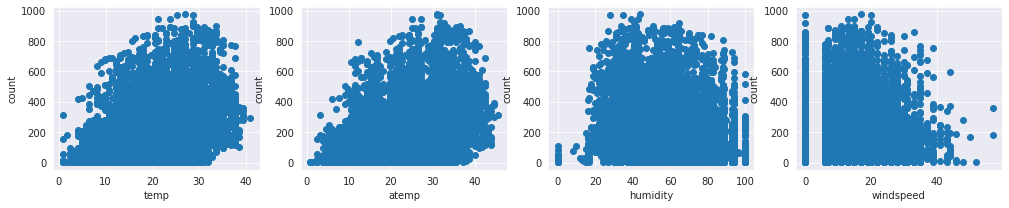

In [ ]:
fields = [f for f in train]
fields= fields[5:-3]

fig = plt.figure(figsize =(17,3))
for i,f in enumerate(fields):
  ax = fig.add_subplot(1,4,i+1)
  ax.scatter(train[f],train['count'])
  ax.set_ylabel('count')
  ax.set_xlabel(f)

plt.show()

[Text(0, 0.5, 'count'), Text(0.5, 0, 'weather')]

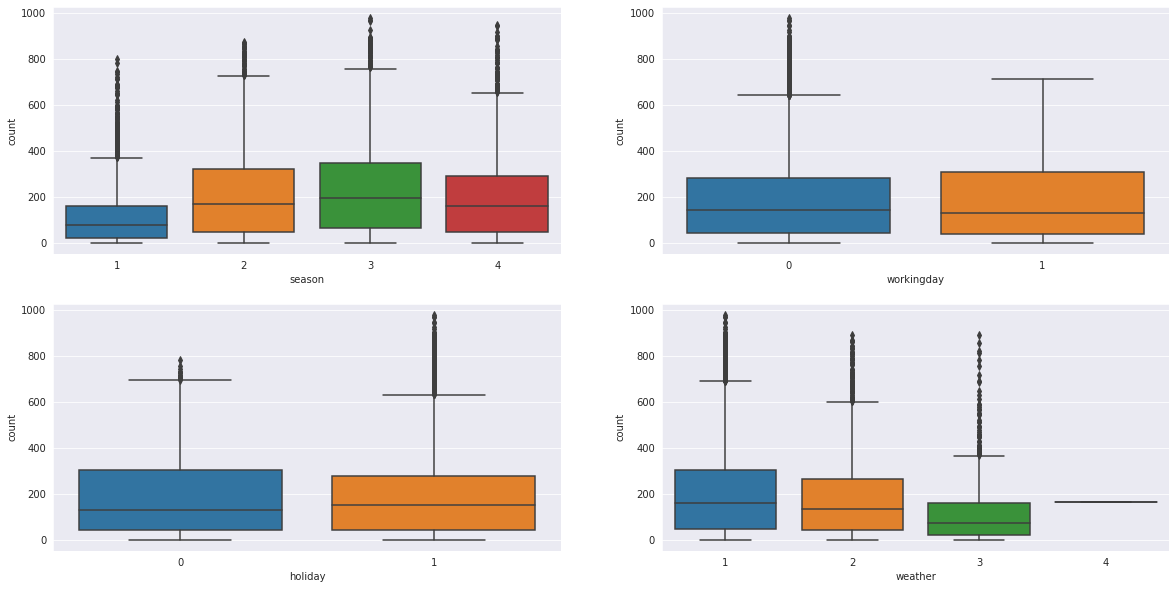

In [ ]:
fig,axes = plt.subplots(nrows = 2,ncols = 2)
fig.set_size_inches(20,10)
sns.boxplot(data = train, y = 'count', x = 'season', ax = axes[0][0])
sns.boxplot(data = train, y = 'count', x = 'holiday', ax = axes[0][1])
sns.boxplot(data = train, y = 'count', x = 'workingday', ax = axes[1][0])
sns.boxplot(data = train, y = 'count', x = 'weather', ax = axes[1][1])

axes[0][0].set(ylabel = 'count', xlabel = 'season')
axes[1][0].set(ylabel = 'count', xlabel = 'holiday')
axes[0][1].set(ylabel = 'count', xlabel = 'workingday')
axes[1][1].set(ylabel = 'count', xlabel = 'weather')



<AxesSubplot:>

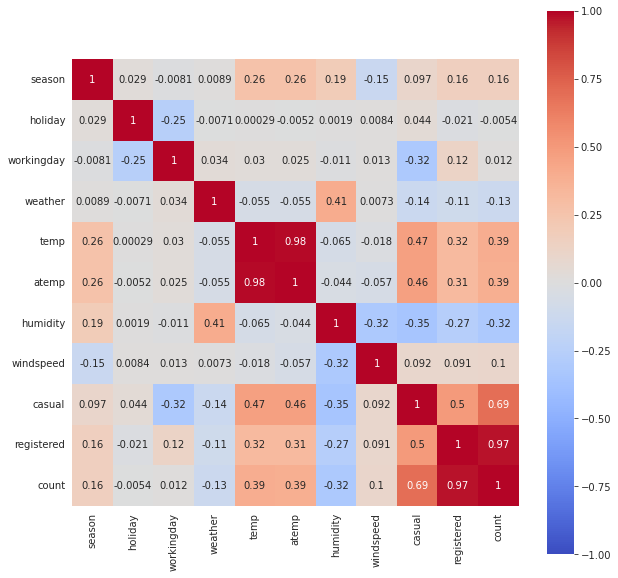

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(train.corr('pearson'), vmin = -1, vmax= 1, cmap = 'coolwarm', annot = True, square = True)

preprocecing

In [ ]:
train['datetime']= pd.to_datetime(train['datetime'])
test['datetime']= pd.to_datetime(test['datetime'])


In [ ]:
def split_datetime(df):
  df['year'] = df['datetime'].apply(lambda t:t.year)
  df['month'] = df['datetime'].apply(lambda t:t.month)
  df['day'] = df['datetime'].apply(lambda t:t.day)
  df['dayofweek'] = df['datetime'].apply(lambda t:t.dayofweek)
  df['hour'] = df['datetime'].apply(lambda t:t.hour)
  df = df.drop(['datetime'],axis = 1)
  return df

In [ ]:
train = split_datetime(train)
test = split_datetime(test)
train = train.drop(['casual','registered'], axis = 1)
train.head()



,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,5,4


In [ ]:
train['count'] = np.log1p(train['count'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

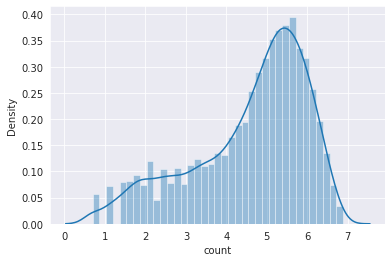

In [ ]:
sns.distplot(train['count'])

delete outliers

In [ ]:
train = train[np.abs(train['count'])-train['count'].mean() <=(3*train['count'].std())]

<AxesSubplot:xlabel='count'>

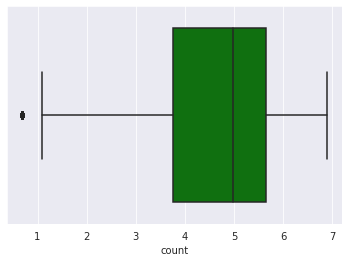

In [ ]:
sns.boxplot(x = 'count', data = train, color = 'green')

In [ ]:
drop_idx = train[(train['atemp']>20) & (train['atemp']<40) & (train['temp']>10) & (train['temp']<20)].index
train= train.drop(drop_idx)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
def scaling(df):
  scaler = MinMaxScaler()
  num_cols = ['temp','atemp','humidity','windspeed']
  df[num_cols] = scaler.fit_transform(df[num_cols])
  return df
  

In [ ]:
train = scaling(train)
test = scaling(test)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,0.224490,0.305068,0.81,0.0,2.833213,2011,1,1,5,0
1,1,0,0,1,0.204082,0.288064,0.80,0.0,3.713572,2011,1,1,5,1
2,1,0,0,1,0.204082,0.288064,0.80,0.0,3.496508,2011,1,1,5,2
3,1,0,0,1,0.224490,0.305068,0.75,0.0,2.639057,2011,1,1,5,3
4,1,0,0,1,0.224490,0.305068,0.75,0.0,0.693147,2011,1,1,5,4


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train.drop(['count'], axis = 1), train['count'], test_size = 0.3)

metrics MSE

In [ ]:
def rmsle(y,pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squere = np.square(log_y-log_pred)
  mse = np.sqrt(np.mean(squere)) 
  return mse

MODEL

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from  sklearn.model_selection import GridSearchCV

In [ ]:
def evaluate(reg_cls, params=None):
    reg = reg_cls()
    if params:
        reg = GridSearchCV(reg, param_grid=params, refit=True)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    y_test_exp = np.expm1(y_test)
    pred_exp = np.expm1(pred)
    print('\n', reg_cls)
    if params:
        print(reg.best_params_)
        reg = reg.best_estimator_
    print(rmsle(y_test_exp, pred_exp))
    return reg, pred_exp

In [ ]:
lr_reg, pred_lr = evaluate(LinearRegression)
rg_reg, pred_lg = evaluate(Ridge)
ls_reg, pred_ls = evaluate(Lasso)
rf_reg, pred_rf = evaluate(RandomForestRegressor)
gb_reg, pred_gb = evaluate(GradientBoostingRegressor)
xg_reg, pred_xg = evaluate(XGBRegressor)
lg_reg, pred_lg = evaluate(LGBMRegressor)

params = {'n_estimators': [100*i for i in range(1, 6)]}
xg_reg, pred_xg = evaluate(XGBRegressor, params)
lg_reg, pred_lg = evaluate(LGBMRegressor, params)



 <class 'sklearn.linear_model._base.LinearRegression'>
0.9957326642030507

 <class 'sklearn.linear_model._ridge.Ridge'>
0.9957430278297429

 <class 'sklearn.linear_model._coordinate_descent.Lasso'>
1.1624710577363846

 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
0.30006462346037244

 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
0.37725441699323303

 <class 'xgboost.sklearn.XGBRegressor'>
0.29092791071044954

 <class 'lightgbm.sklearn.LGBMRegressor'>
0.2791247589825995

 <class 'xgboost.sklearn.XGBRegressor'>
{'n_estimators': 100}
0.29092791071044954

 <class 'lightgbm.sklearn.LGBMRegressor'>
{'n_estimators': 400}
0.27017789889706756


In [ ]:
submission = pd.read_csv('/content/sampleSubmission.csv', index_col=False)


prediction

In [ ]:
pred = lg_reg.predict(test)
pred_exp = np.expm1(pred)
print(pred_exp)

[  7.12668931   3.31402176   2.62486305 ... 134.66001995  88.10499077
  44.38569926]


In [ ]:
submission.loc[:,'count']= pred_exp
submission

,datetime,count
0,2011-01-20 00:00:00,7.126689
1,2011-01-20 01:00:00,3.314022
2,2011-01-20 02:00:00,2.624863
3,2011-01-20 03:00:00,1.950256
4,2011-01-20 04:00:00,1.316870
...,...,...
6488,2012-12-31 19:00:00,248.706278
6489,2012-12-31 20:00:00,150.864583
6490,2012-12-31 21:00:00,134.660020
6491,2012-12-31 22:00:00,88.104991


In [ ]:
submission.to_csv('/content/sampleSubmission.csv',index=False)